<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/OLS_3_Transformaciones_Dummies_RegMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalacion e Importacion de Librerias



In [2]:
!pip install geopandas

     |████████████████████████████████| 962kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 16.8MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [3]:
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [5]:
departamentos.head()

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 1819-CRI180 ubicado en: Av. Callao 1...,None,2019-10-10,0,Argentina,Capital Federal,Recoleta,None,None,None,-34.588601,-58.388285,Alquiler,Alquiler,18000,Mensual,NaN,2019-09-26,52,58,b'Recoleta. Av. Callao y Av. Alvear. Piso alto...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,b'Residencia de estudiantes y viajeros. Son do...,None,2019-11-04,1,Argentina,Capital Federal,Balvanera,None,None,None,-34.606939,-58.393496,Alquiler,Alquiler,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,b'CODIGO: 1348-AF021227 ubicado en: Tacuari 26...,None,2019-09-28,2,Argentina,Capital Federal,Monserrat,None,None,None,-34.611352,-58.379205,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,b'Departamento de dos ambientes a 200 metros d...,None,2020-02-12,4,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,San Justo,None,None,-34.680777,-58.553166,Alquiler,Alquiler,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.240 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 733-1600MARIANOA ubicado en: MARIANO...,None,2019-11-10,5,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.577983,-58.472185,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)


# OLS

Modelo:

$price_i=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [6]:
datos=departamentos[['price', 'bedrooms']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos.bedrooms
X=sm.add_constant(X)

In [7]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          7.68e-308
Time:                        22:00:42   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

# Histrograma de Errores Estimados


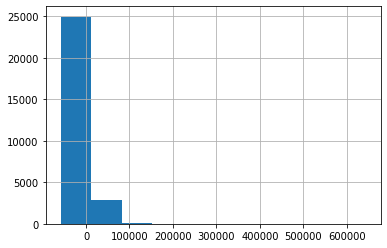

In [8]:
residuos=datos.price-resultados.predict(X)
residuos.hist()

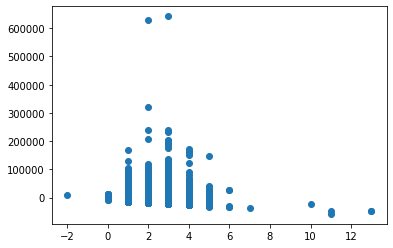

In [9]:
plt.scatter(datos.bedrooms,residuos)

#Transformación Logarítmica

Modelo propuesto:

$log(price_i)=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [10]:
logY=np.log(Y)

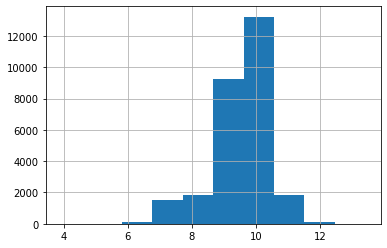

In [11]:
logY.hist()

In [12]:
modelo=sm.OLS(logY,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.53
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           9.96e-06
Time:                        22:00:43   Log-Likelihood:                -35268.
No. Observations:               27879   AIC:                         7.054e+04
Df Residuals:                   27877   BIC:                         7.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4810      0.011    841.888      0.0

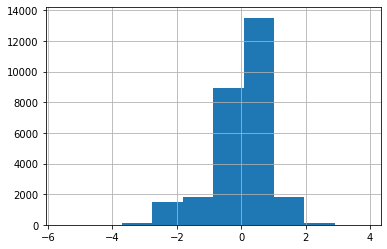

In [13]:
residuos2=logY-resultados.predict(X)
residuos2.hist()

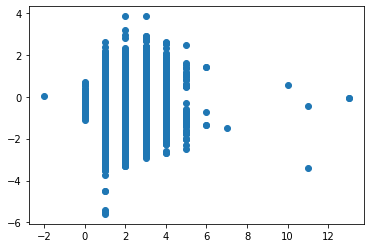

In [14]:
plt.scatter(datos.bedrooms,residuos2)

# Creacion de variable Dummies para los barrios de CABA
Para este ejercicio solo estudiaremos los datos de CABA

In [15]:
departamentosCABA=departamentos.loc[departamentos['l2']=='Capital Federal']

In [16]:
departamentosCABA.l3.unique()

array(['Recoleta', 'Balvanera', 'Monserrat', 'Villa Urquiza', 'Almagro',
       'Palermo', 'Belgrano', 'Caballito', b'Nu\xf1ez', 'Congreso',
       'Saavedra', 'Barrio Norte', 'Puerto Madero', 'Retiro', 'Once',
       'Barracas', 'Floresta', 'Chacarita', 'Colegiales',
       b'Las Ca\xf1itas', b'San Nicol\xe1s', 'Villa Crespo',
       'Villa del Parque', 'Parque Centenario', b'Villa Pueyrred\xf3n',
       'Villa General Mitre', 'Boedo', 'Flores', 'Coghlan', 'Paternal',
       'San Telmo', 'Monte Castro', 'Villa Devoto', 'San Cristobal',
       'Parque Chacabuco', 'Parque Avellaneda', 'Abasto', 'Mataderos',
       'Tribunales', 'Villa Luro', 'Villa Ortuzar',
       'Centro / Microcentro', 'Boca', 'Liniers', 'Villa Lugano',
       'Parque Chas', b'Constituci\xf3n', b'Agronom\xeda',
       'Parque Patricios', None, 'Versalles', 'Villa Santa Rita',
       'Velez Sarsfield', 'Pompeya', 'Villa Real', 'Villa Riachuelo',
       'Catalinas'], dtype=object)

In [17]:
# Un extra. Calculo del numero de observaciones por barrio usando groupby
departamentosCABA.groupby(by='l3').agg(['count'])['index']

,count
l3,
b'Agronom\xeda',37
b'Constituci\xf3n',130
b'Las Ca\xf1itas',379
b'Nu\xf1ez',1145
b'San Nicol\xe1s',322
b'Villa Pueyrred\xf3n',246
Abasto,163
Almagro,1406
Balvanera,698


In [18]:
## Construccion de dummies para una variable categorica de manera automatizada

In [19]:
dummiesbarrios=pd.get_dummies(departamentosCABA.l3, prefix='dum')
dummiesbarrios

,dum_b'Agronom\xeda',dum_b'Constituci\xf3n',dum_b'Las Ca\xf1itas',dum_b'Nu\xf1ez',dum_b'San Nicol\xe1s',dum_b'Villa Pueyrred\xf3n',dum_Abasto,dum_Almagro,dum_Balvanera,dum_Barracas,dum_Barrio Norte,dum_Belgrano,dum_Boca,dum_Boedo,dum_Caballito,dum_Catalinas,dum_Centro / Microcentro,dum_Chacarita,dum_Coghlan,dum_Colegiales,dum_Congreso,dum_Flores,dum_Floresta,dum_Liniers,dum_Mataderos,dum_Monserrat,dum_Monte Castro,dum_Once,dum_Palermo,dum_Parque Avellaneda,dum_Parque Centenario,dum_Parque Chacabuco,dum_Parque Chas,dum_Parque Patricios,dum_Paternal,dum_Pompeya,dum_Puerto Madero,dum_Recoleta,dum_Retiro,dum_Saavedra,dum_San Cristobal,dum_San Telmo,dum_Tribunales,dum_Velez Sarsfield,dum_Versalles,dum_Villa Crespo,dum_Villa Devoto,dum_Villa General Mitre,dum_Villa Lugano,dum_Villa Luro,dum_Villa Ortuzar,dum_Villa Real,dum_Villa Riachuelo,dum_Villa Santa Rita,dum_Villa Urquiza,dum_Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50649,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
departamentosCABA=pd.concat([departamentosCABA, dummiesbarrios],axis=1)

#Estimacion del Modelo con dummys

Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*DPalermo+\epsilon_i$


In [21]:
datos=departamentosCABA[['price', 'bedrooms','dum_Palermo']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['bedrooms','dum_Palermo']]
X=sm.add_constant(X)

In [22]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     282.1
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          1.75e-121
Time:                        22:00:44   Log-Likelihood:            -2.1589e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.305e+04    262.836     49.666      

In [23]:
Ypred=resultados.predict(X)

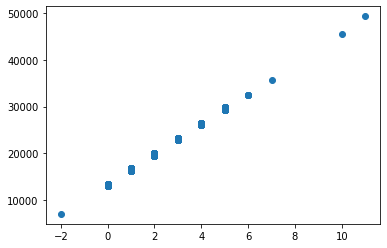

In [24]:
plt.scatter(datos.bedrooms,Ypred)

#Estimacion del Modelo Multivariado

Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*surface+\epsilon_i$

In [25]:
datos=departamentosCABA[['price', 'bedrooms','surface_to']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['bedrooms','surface_to']]
X=sm.add_constant(X)
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     281.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          3.10e-121
Time:                        22:00:44   Log-Likelihood:            -2.1590e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.313e+04    259.172     50.670      0.0

In [26]:
datos=departamentosCABA[['price', 'bedrooms','surface_to']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['surface_to']]
X=sm.add_constant(X)
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.025
Date:                Thu, 25 Jun 2020   Prob (F-statistic):            0.00267
Time:                        22:01:54   Log-Likelihood:            -2.1617e+05
No. Observations:               19381   AIC:                         4.323e+05
Df Residuals:                   19379   BIC:                         4.324e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.845e+04    128.807    143.224      0.0